# Notebook for exploring the ViCTSD dataset

## Import libraries and load data

In [10]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import emoji

In [11]:
# Load data
train = pd.read_csv('../Dataset/ViCTSD/ViCTSD_train.csv')
test = pd.read_csv('../Dataset/ViCTSD/ViCTSD_test.csv')
dev = pd.read_csv('../Dataset/ViCTSD/ViCTSD_valid.csv')

data = pd.concat([train, test, dev])

## Data overview

In [12]:
# Data exploration
data.head()

,Unnamed: 0,Comment,Constructiveness,Toxicity,Title,Topic
0,6326,Thật tuyệt vời...!!!,0,0,Những 'bước tiến diệu kỳ' của Trúc Nhi - Diệu Nhi,SucKhoe
1,7835,"mỹ đã tuột dốc quá nhiều rồi, giờ muốn vực dậy...",1,0,Hình tượng Mỹ sụp đổ trong lòng người dân thế ...,TheGioi
2,4690,tôi thấy người lái xe hơi bấm còi mới là người...,1,1,Cả trăm người đạp xe thể dục bịt kín đường,OtoXemay
3,6011,Coi dịch là giặc. Đã mang tên đó mà xâm nhập V...,0,0,11 ngày không lây nhiễm nCoV cộng đồng,SucKhoe
4,9303,Thương các bé quá! Các con còn quá nhỏ mà đã p...,0,0,5 trẻ chết đuối dưới ao,ThoiSu


In [13]:
print(data['Toxicity'].value_counts())

Toxicity
0    8899
1    1101
Name: count, dtype: int64


In [14]:
print(data['Comment'].value_counts())

Comment
Cầu mong mọi người bình an! Việt Nam cố lên! Đất nước chiến thắng!                                                                                                                                                               16
Cầu mong thế giới bình an!                                                                                                                                                                                                       12
Việt Nam cố lên! Đất nước chiến thắng!                                                                                                                                                                                            6
Hãy dồn phiếu cho TT Trump . Xin cám ơn                                                                                                                                                                                           3
Cầu mong mọi người bình an!                                                     

## Missing & duplicate values

In [15]:
# Missing values
data.isnull().sum()

Unnamed: 0          0
Comment             0
Constructiveness    0
Toxicity            0
Title               0
Topic               0
dtype: int64

In [27]:
# Duplicate rows
duplicate_rows = data[data['Comment'].duplicated()]
print(duplicate_rows)

      Unnamed: 0                                            Comment  \
528         6141  Cầu mong mọi người bình an! Việt Nam cố lên! Đ...   
733         7063                         Cầu mong ông sớm khỏe mạnh   
1436        6199  Cầu mong mọi người bình an! Việt Nam cố lên! Đ...   
2045        7886                         Cầu mong thế giới bình an!   
2432        4085  Theo e thì cứ xe mới mà quất. Ngày xưa ck e k ...   
...          ...                                                ...   
1662         435                                   Tuổi thơ của tôi   
1664        7891                         Cầu mong thế giới bình an!   
1868        9095  vẫn phải chờ kết quả xét nghiệm mới có kết luậ...   
1869        6244  Cầu mong mọi người bình an! Việt Nam cố lên! Đ...   
1907        6073        Tuyệt vời, cố lên nào. Cảm ơn các y bác sĩ.   

      Constructiveness  Toxicity  \
528                  0         0   
733                  0         0   
1436                 0         0   
204

In [28]:
# Number of unique values in Comment
num_unique_values = data['Comment'].nunique()
print(f'{num_unique_values}/{data.shape[0]}')

9935/10000


## Distribution

In [29]:
data['sentence_length'] = data['Comment'].apply(len)
print(data['sentence_length'].describe())

count    10000.000000
mean       128.610900
std        139.193371
min          3.000000
25%         48.000000
50%         87.000000
75%        156.000000
max       1494.000000
Name: sentence_length, dtype: float64


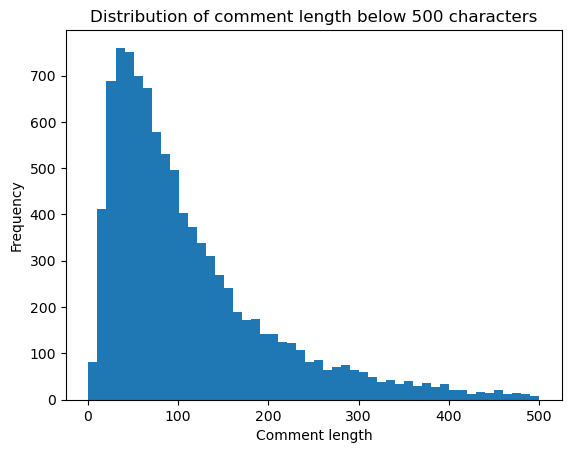

In [31]:
plt.hist(data['sentence_length'], bins=50, range=[1, 500])
plt.title('Distribution of comment length below 500 characters')
plt.xlabel('Comment length')
plt.ylabel('Frequency')
plt.show()

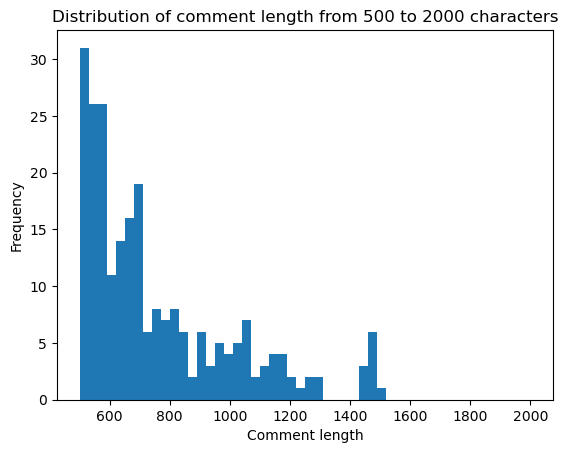

In [33]:
plt.hist(data['sentence_length'], bins=50, range=([500, 2000]))
plt.title('Distribution of comment length from 500 to 2000 characters')
plt.xlabel('Comment length')
plt.ylabel('Frequency')
plt.show()

## Wordcloud

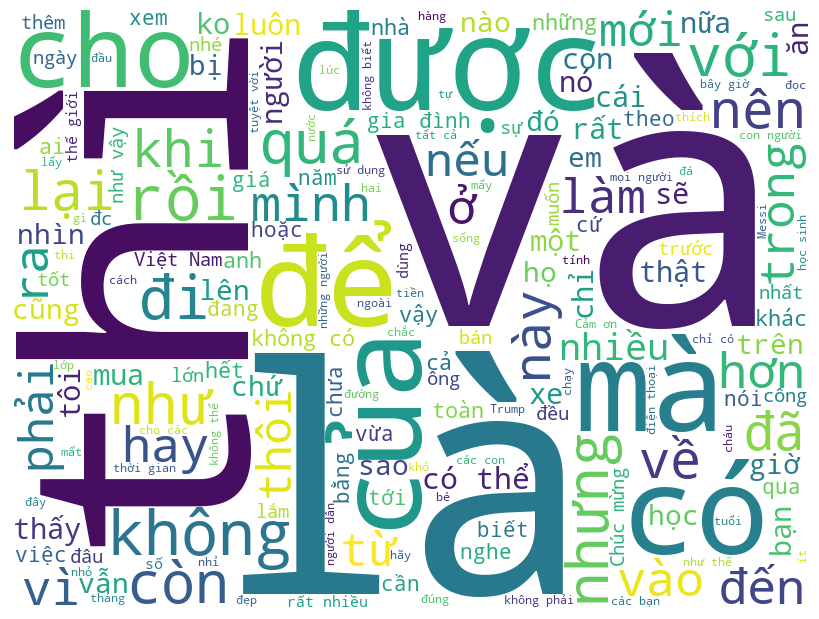

In [34]:
# Join all the text in 'Comment' into a single string
text = ' '.join(data['Comment'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=600,
                      background_color='white',
                      stopwords=None,
                      min_font_size=10).generate(text)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

## Some special examples

In [36]:
print(data[data['sentence_length']<5])

      Unnamed: 0 Comment  Constructiveness  Toxicity  \
5431        2788    cưng                 0         0   
1743        4505     Đẹp                 0         0   

                                                Title     Topic  \
5431               Chó mẹ nhận nuôi báo đen bị bỏ rơi   KhoaHoc   
1743  Audi Q5 Sportback 2021 - đối thủ mới của BMW X4  OtoXemay   

      sentence_length  
5431                4  
1743                3  


In [37]:
print(data[data['sentence_length'] >= 1000])

      Unnamed: 0                                            Comment  \
98          3667  Mục đích của Bảo Hiểm là bảo vệ.Mỗi năm bạn tr...   
546         3672  Với điều kiện của bạn tôi tư vấn như sau:Đầu t...   
797         3763  bđs chưa bao giờ về lại giá trị thực sự cho ng...   
854         8652  Mùa hè giông bão đã xaGiờ ta thấy lại Barca hù...   
906         3810  Theo ý kiến cá nhân, tôi nghĩ bạn chỉ nên đầu ...   
959         1688  Con tôi cũng đang học chương trình cải cách gi...   
1022        3632  tham gia BHNT rất tốt bạn nên tham gia lúc còn...   
1453        1879  Việc sử dụng điện thoại thông minh, máy tính, ...   
1522        8140  Nếu tôi là sancho tôi sẽ tự hỏi , clb có thể m...   
1631        9246  Không nên mở thêm nhiều như thế sẽ không hiệu ...   
1739        4420  Với túi tiền khoảng tầm trên dưới 500 triệu th...   
1869        8430  Với bất cứ kịch bản nào thì tầm quan trọng cũn...   
2300         828  Bài hit thì vô khối:- Giai đoạn 1998 - 2001 tô...   
2392  